# check


In [8]:
# check xem tập test có đủ nhãn không :)))) 
path_test_folder = "../DATN_data/roboflow/v0/test/labels"
path_train_folder = "../DATN_data/roboflow/v0/train/labels"
test_set = set()
train_set = set()


In [12]:
import os
test_file_name_list = os.listdir(path_test_folder)
for test_file_name in test_file_name_list:
    with open("{}/{}".format(path_test_folder, test_file_name), "r") as f:
        line = f.readline()
        label = line.split(" ")[0]
        test_set.add(label)
train_file_name_list = os.listdir(path_train_folder)
for train_file_name in train_file_name_list:
    with open("{}/{}".format(path_train_folder, train_file_name), "r") as f:
        line = f.readline()
        label = line.split(" ")[0]
        train_set.add(label)
        

In [15]:
count = 0
for label in test_set:
    if label not in train_set:
        count+=1
        print("label {} not in train set".format(label))
print(count)

label 48 not in train set
1


##  tạo folder nếu chưa tồn tại 

In [15]:
import os
import shutil

root_v10 = "roboflow\\v0"
root_robo_sorted = "DATA_sorted\\v0"
folder_type = "train"
label_file_name_list = os.listdir("{}/{}/labels".format(root_v10, folder_type))
for label_file_name in label_file_name_list:
    image_file_name = label_file_name.replace(".txt",".jpg")
    source_label_file = "{}/{}/labels/{}".format(root_v10, folder_type, label_file_name)
    source_image_file = "{}/{}/images/{}".format(root_v10, folder_type, image_file_name)  
    with open(source_label_file, "r") as f:
        line = f.readline()
        label_folder_name = line.split(" ")[0]
        #if not exist in label ==> we create both labels, and images folder for each class
        if not os.path.exists(os.path.join(root_robo_sorted,"labels",label_folder_name)):
            os.mkdir(os.path.join(root_robo_sorted,"labels",label_folder_name))
            os.mkdir(os.path.join(root_robo_sorted,"images",label_folder_name))
        target_label_file = "{}/labels/{}/{}".format(root_robo_sorted,label_folder_name, label_file_name)
        target_image_file = "{}/images/{}/{}".format(root_robo_sorted,label_folder_name, image_file_name)
        print(label_file_name)
        print(image_file_name)
        
        
        shutil.copyfile(source_label_file, target_label_file)
        shutil.copyfile(source_image_file, target_image_file)
        
        

100_jpg.rf.efb95ac4aae007f9e3de18e75161ff73.txt
100_jpg.rf.efb95ac4aae007f9e3de18e75161ff73.jpg
105_jpg.rf.17e41c20a7285060acbe237160f51b1a.txt
105_jpg.rf.17e41c20a7285060acbe237160f51b1a.jpg
105_jpg.rf.8a0637efd457b7f00c9a1a9f681f79ef.txt
105_jpg.rf.8a0637efd457b7f00c9a1a9f681f79ef.jpg
105_jpg.rf.9a78ddfa6a37ea685dd2511c74fa99bb.txt
105_jpg.rf.9a78ddfa6a37ea685dd2511c74fa99bb.jpg
105_jpg.rf.9d6105a5759bf8c402e8b88914bc8751.txt
105_jpg.rf.9d6105a5759bf8c402e8b88914bc8751.jpg
105_jpg.rf.b79971ca51e16fde1c7e4f856307d65a.txt
105_jpg.rf.b79971ca51e16fde1c7e4f856307d65a.jpg
105_jpg.rf.cb3da28bb8f128fa2d92d767c2d68405.txt
105_jpg.rf.cb3da28bb8f128fa2d92d767c2d68405.jpg
120_jpg.rf.86d4f3d0a93882c1f8a2322a8f336b37.txt
120_jpg.rf.86d4f3d0a93882c1f8a2322a8f336b37.jpg
120_jpg.rf.9a73876d506ef32e2283e1f16371184c.txt
120_jpg.rf.9a73876d506ef32e2283e1f16371184c.jpg
120_jpg.rf.ed63f897ac48af1dbdf90a5349f83733.txt
120_jpg.rf.ed63f897ac48af1dbdf90a5349f83733.jpg
135_jpg.rf.350e876b14bcf2b118473d30f44ac

In [16]:
#Thay tên folder và tên file 
#mở file chứa tên class
#get all class name
with open("roboflow\\v0\\data.yaml") as f:
    line = f.readline()
    while line:
        if line.startswith("names:"):
            break
        line = f.readline()
    classes = line.split(" ",1)[1]
    classes = eval(classes)
    

# Sửa tên folder ở images trước rồi kéo theo fix name folder in labels then


In [17]:
root_robo_sorted = "DATA_sorted\\v0"
folder_name_list = os.listdir("{}/images".format(root_robo_sorted))
for folder_name in folder_name_list:
    folder_name_image_source = "{}/images/{}".format(root_robo_sorted, folder_name)
    folder_name_label_source = "{}/labels/{}".format(root_robo_sorted, folder_name)
    
    try:
        folder_name_image_target = "{}/images/{}".format(root_robo_sorted,folder_name +"_"+ classes[int(folder_name)])
        folder_name_label_target = "{}/labels/{}".format(root_robo_sorted,folder_name +"_"+ classes[int(folder_name)])
        os.rename(folder_name_image_source, folder_name_image_target)
        os.rename(folder_name_label_source, folder_name_label_target)
    except:
        pass
    
    

# rename file_name in each folder

In [18]:
# rename file name in image first and then label
root_folder_image_list = "DATA_sorted\\v0\\images"
root_folder_label_list = "DATA_sorted\\v0\\labels"
folder_name_list = os.listdir(root_folder_image_list)
for folder_name in folder_name_list:
    file_name_image_list  = os.listdir("{}/{}".format(root_folder_image_list, folder_name))
    for index, file_name_image in enumerate(file_name_image_list):
        source_image_file  = "{}/{}/{}".format(root_folder_image_list, folder_name, file_name_image)
        print(source_image_file)
        target_image_file  = "{}/{}/{}".format(root_folder_image_list, folder_name, folder_name+"_(00)__(" + str(index)+").jpg")
        print(target_image_file)
        # os.rename(source_image_file, target_image_file)
        source_label_file = "{}/{}/{}".format(root_folder_label_list, folder_name, file_name_image.replace(".jpg",".txt"))
        target_label_file = "{}/{}/{}".format(root_folder_label_list, folder_name, folder_name+"_(00)__(" + str(index)+").txt")
        os.rename(source_label_file, target_label_file)
        os.rename(source_image_file, target_image_file)
        
    
        

DATA_sorted\v0\images/0_Pill/100_jpg.rf.efb95ac4aae007f9e3de18e75161ff73.jpg
DATA_sorted\v0\images/0_Pill/0_Pill_(00)__(0).jpg
DATA_sorted\v0\images/0_Pill/cilin--11-_jpg.rf.aed1bf38aa0d89cb2152f86c1aca762d.jpg
DATA_sorted\v0\images/0_Pill/0_Pill_(00)__(1).jpg
DATA_sorted\v0\images/0_Pill/cilin--9-_jpg.rf.78fa0324863474387dc3a58e84a26a60.jpg
DATA_sorted\v0\images/0_Pill/0_Pill_(00)__(2).jpg
DATA_sorted\v0\images/10_concor/concor--10-_jpg.rf.4eafe690fad03a016e610ff2d86f68d5.jpg
DATA_sorted\v0\images/10_concor/10_concor_(00)__(0).jpg
DATA_sorted\v0\images/10_concor/concor--11-_jpg.rf.781569e22c0ddff9c32d731cf249e03b.jpg
DATA_sorted\v0\images/10_concor/10_concor_(00)__(1).jpg
DATA_sorted\v0\images/10_concor/concor--12-_jpg.rf.2435d382a2311a7095bb68bc58826a18.jpg
DATA_sorted\v0\images/10_concor/10_concor_(00)__(2).jpg
DATA_sorted\v0\images/10_concor/concor--13-_jpg.rf.4cc0e8f9595e25b8327b702df969847a.jpg
DATA_sorted\v0\images/10_concor/10_concor_(00)__(3).jpg
DATA_sorted\v0\images/10_conco


# Draw bounding box

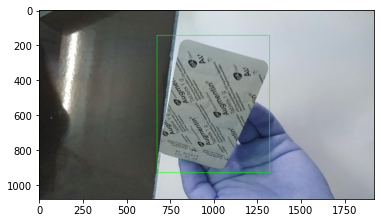

In [9]:
import cv2
image_path = "../DATN_data/robo_sorted/v10/images/9_augmentin/9_augmentin__(5).jpg"
im = cv2.imread(image_path)
# print("im shape: {}".format(im.shape))
hight, weight, _ = im.shape


import matplotlib.pyplot as plt


label_path = image_path.replace("images","labels").replace(".jpg",".txt")
with open(label_path, "r") as f:
    line = f.readline()
    # print(line.split())
    label,x, y ,w, h = [float(x) for x in line.split(" ")]

cv2.rectangle(im,(int((x-w/2)*weight),int((y-h/2)*hight)),(int((x+w/2)*weight),int((y+h/2)*hight)),(0,255,0),2)
plt.imshow(im)



In [4]:
print("hight: {}".format(hight))
print("weight: {}".format(weight))

hight: 1080
weight: 1920


# copy image between 2 folder 

In [56]:
import os
import shutil
source_root =  "DATA_sorted\\v0"
target_root =  "DATA_sorted\\v0_v10_raw"

source_folder_name =  "20_tanakan"
target_folder_name =    "42_tanakan"


source_image_folder_path = "{}/images/{}".format(source_root, source_folder_name)
source_label_folder_path = "{}/labels/{}".format(source_root, source_folder_name)

target_image_folder_path = "{}/images/{}".format(target_root, target_folder_name)
target_label_folder_path = "{}/labels/{}".format(target_root, target_folder_name)

image_name_list = os.listdir(source_image_folder_path)
for image_name in image_name_list:
    source_image_file = "{}/{}".format(source_image_folder_path, image_name)
    target_image_file = "{}/{}".format(target_image_folder_path, image_name)
    
    source_label_file = "{}/{}".format(source_label_folder_path, image_name.replace(".jpg",".txt"))
    target_label_file = "{}/{}".format(target_label_folder_path, image_name.replace(".jpg",".txt"))

    # print("source_image_file: {}".format(source_image_file))
    # print("target_image_file: {}".format(target_image_file))
    # print("source_label_file: {}".format(source_label_file))
    # print("target_label_file: {}".format(target_label_file))
    shutil.copy(source_image_file, target_image_file)
    shutil.copy(source_label_file, target_label_file)

# source_label_folder_path = source_image_file.replace("\\images\\","\\labels\\")



